In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import os
target_path = '../data/LOG_G/stable/'
contents = os.listdir(target_path)
data = pd.DataFrame()
num = 0
for c in range(len(contents)):
    print(target_path+contents[c])
    n_data = pd.read_csv(target_path+contents[c],header=None)
    data = pd.concat([data,n_data])

print(len(data))
d = data
#print(ball)
#print(joy)

../data/LOG_G/stable/log201807311344.csv
../data/LOG_G/stable/log201807292107.csv
../data/LOG_G/stable/log201807292213.csv
../data/LOG_G/stable/log201807311352.csv
../data/LOG_G/stable/log201807311349.csv
../data/LOG_G/stable/log201807292116.csv
../data/LOG_G/stable/log201807311336.csv
../data/LOG_G/stable/log201807292215.csv
../data/LOG_G/stable/log201807292207.csv
../data/LOG_G/stable/log201807292110.csv
../data/LOG_G/stable/log201807311347.csv
32853


In [3]:
d.columns = ['l_bx','l_by','l_pole0x','l_pole0y','l_pole1x','l_pole1y','g_bx','g_by','g_pole0x','g_pole0y','g_pole1x','g_pole1y','g_px','g_py','g_pth','ljx','ljy','rjx','rjy']
#d = d[d.bx!=-1]

In [4]:
'''
from sklearn.cross_validation import train_test_split
t1 = []
t2 = []
def f1(x,y):
    return y * np.sin(x) + np.square(x)
def f2(x,y):
    return x * np.cos(y) + np.square(y)
for a in range(1000):
    r = np.array([np.random.rand(), np.random.rand()])
    t1.append(r)
    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))
IN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)

IN_train = np.array(IN_train)
IN_test = np.array(IN_test)
TAR_train = np.array(TAR_train)
TAR_test = np.array(TAR_test)
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
print(f1(1,1))
print(f2(1,1))
'''

'\nfrom sklearn.cross_validation import train_test_split\nt1 = []\nt2 = []\ndef f1(x,y):\n    return y * np.sin(x) + np.square(x)\ndef f2(x,y):\n    return x * np.cos(y) + np.square(y)\nfor a in range(1000):\n    r = np.array([np.random.rand(), np.random.rand()])\n    t1.append(r)\n    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))\nIN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)\n\nIN_train = np.array(IN_train)\nIN_test = np.array(IN_test)\nTAR_train = np.array(TAR_train)\nTAR_test = np.array(TAR_test)\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\nprint(f1(1,1))\nprint(f2(1,1))\n'

In [5]:
from sklearn.cross_validation import train_test_split
l_ball = np.array(d.iloc[:,0:2])
l_pole0 = np.array(d.iloc[:,2:4])
l_pole1 = np.array(d.iloc[:,4:6])
input_d = np.array(d.iloc[:,0:6])
g_ball = np.array(d.iloc[:,6:8])
g_pole0 = np.array(d.iloc[:,8:10])
g_pole1 = np.array(d.iloc[:,10:12])
g_pos = np.array(d.iloc[:,12:14])
output_d = np.array(d.iloc[:,14:18])
ljoy = np.array(d.iloc[:,14:16])
rjoy = np.array(d.iloc[:,16:18])

input_d = np.array(d.iloc[:,0:6])
output_d = np.array(d.iloc[:,14:18])
print(input_d.shape)
print(output_d.shape)

IN_train, IN_test, TAR_train, TAR_test = train_test_split(input_d,output_d,test_size=0.2,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
#IN_train = IN_train/100.0
#IN_test = IN_test/100.0
for t in range(10):
    print(IN_train[t])
'''
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
'''

(32853, 6)
(32853, 4)
[ 0.26507283 -0.12912751  1.93868955  2.07983174  2.28975789 -0.49635751]
[ 0.7522718   0.32540024  1.74107202  2.07986238  2.89844302 -0.24833272]
[ 0.40731088 -0.01143569  1.49269182  0.32712971  1.22747513 -2.25930801]
[2.82947013 1.27166372 1.00351973 3.19039456 3.31746766 2.00479555]
[ 3.10863438 -0.73276001  6.68595478  1.98437951  7.59210989 -0.45260283]
[2.67322077 1.01560967 1.01623561 3.08201294 3.22152338 1.7048035 ]
[ 0.44459806  0.38500604  1.49200801  1.93614835  2.3476051  -0.51904077]
[ 0.52533711 -0.0316782   0.88645154  0.96624206  3.01853728 -0.52178025]
[ 0.54904566  0.07638845  1.39258296  1.52994657  1.75798521 -1.04424868]
[2.39541926 0.03300046 3.05722124 2.59769167 3.27572722 0.00688965]


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\n'

In [6]:
#　初期化
sess = tf.Session()

IN_size = 6
TAR_size = 4
INPUT = tf.placeholder(shape=[None, IN_size], dtype=tf.float32)
TARGET = tf.placeholder(shape=[None, TAR_size], dtype=tf.float32)

In [7]:
hidden_size = [20 ,10]
batch_size = 100
iter_size = 100000

#　隠れ層の作成 （last layerに直結）
weights = []
biases = []
layers = []
tmp_size = IN_size
last_layer = INPUT
for hsize in hidden_size:
    weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, hsize], stddev=10.0)))
    biases.append(tf.Variable(tf.random_normal(shape=[hsize], stddev=10.0)))
    layers.append(tf.nn.relu(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))) # 活性化関数
    tmp_size = hsize
    last_layer = layers[-1]
    print(layers[-1])
#　出力層
weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, TAR_size], stddev=10.0)))
biases.append(tf.Variable(tf.random_normal(shape=[TAR_size], stddev=10.0)))
layers.append(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))
final_output = layers[-1]
print(final_output)

Tensor("Relu:0", shape=(?, 20), dtype=float32)
Tensor("Relu_1:0", shape=(?, 10), dtype=float32)
Tensor("Add_2:0", shape=(?, 4), dtype=float32)


In [8]:
#　学習
loss = tf.losses.mean_squared_error(TARGET,final_output)
opt = tf.train.AdamOptimizer(0.001)
#opt = tf.train.GradientDescentOptimizer(0.01)
train_step = opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)
loss_vec=[]
for i in range(iter_size):
    rand_index = np.random.choice(len(IN_train), size=batch_size,replace=False)
    rand_in = IN_train[rand_index]
    rand_tar = TAR_train[rand_index]
    sess.run(train_step, feed_dict={INPUT:rand_in, TARGET: rand_tar})
    loss_vec.append(sess.run(loss, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
    if (i+1)%25==0:
#        print(sess.run(INPUT, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
        print('Generation:'+str(i+1)+', Loss = '+str(loss_vec[-1]))

Generation:25, Loss = 1370845200.0
Generation:50, Loss = 1259465700.0
Generation:75, Loss = 1211036700.0
Generation:100, Loss = 1126539600.0
Generation:125, Loss = 941102800.0
Generation:150, Loss = 1125876400.0
Generation:175, Loss = 1036010430.0
Generation:200, Loss = 944503300.0
Generation:225, Loss = 865876600.0
Generation:250, Loss = 864336200.0
Generation:275, Loss = 903393340.0
Generation:300, Loss = 838630000.0
Generation:325, Loss = 792705400.0
Generation:350, Loss = 704784900.0
Generation:375, Loss = 697729660.0
Generation:400, Loss = 628827600.0
Generation:425, Loss = 698995260.0
Generation:450, Loss = 514321400.0
Generation:475, Loss = 645630800.0
Generation:500, Loss = 489683700.0
Generation:525, Loss = 528303700.0
Generation:550, Loss = 514824930.0
Generation:575, Loss = 443765020.0
Generation:600, Loss = 392645540.0
Generation:625, Loss = 380124450.0
Generation:650, Loss = 365670800.0
Generation:675, Loss = 397384420.0
Generation:700, Loss = 355988450.0
Generation:725, L

Generation:6000, Loss = 1476125.6
Generation:6025, Loss = 1272778.8
Generation:6050, Loss = 1691659.2
Generation:6075, Loss = 1810948.8
Generation:6100, Loss = 2674571.0
Generation:6125, Loss = 852249.4
Generation:6150, Loss = 1115820.2
Generation:6175, Loss = 733311.4
Generation:6200, Loss = 832103.06
Generation:6225, Loss = 1557236.5
Generation:6250, Loss = 762866.0
Generation:6275, Loss = 1250779.0
Generation:6300, Loss = 712523.94
Generation:6325, Loss = 682184.56
Generation:6350, Loss = 609205.5
Generation:6375, Loss = 636701.44
Generation:6400, Loss = 1716411.9
Generation:6425, Loss = 1085822.8
Generation:6450, Loss = 1167823.0
Generation:6475, Loss = 3607532.8
Generation:6500, Loss = 946915.75
Generation:6525, Loss = 748119.94
Generation:6550, Loss = 390456.8
Generation:6575, Loss = 1130303.1
Generation:6600, Loss = 647345.94
Generation:6625, Loss = 817806.6
Generation:6650, Loss = 1287653.5
Generation:6675, Loss = 938131.1
Generation:6700, Loss = 371722.12
Generation:6725, Loss

Generation:12075, Loss = 47067.96
Generation:12100, Loss = 5541.998
Generation:12125, Loss = 864.1625
Generation:12150, Loss = 571.24066
Generation:12175, Loss = 4395.9185
Generation:12200, Loss = 15839.345
Generation:12225, Loss = 61637.684
Generation:12250, Loss = 72664.23
Generation:12275, Loss = 895.1094
Generation:12300, Loss = 43202.27
Generation:12325, Loss = 30928.676
Generation:12350, Loss = 14445.645
Generation:12375, Loss = 5849.46
Generation:12400, Loss = 72493.75
Generation:12425, Loss = 21465.414
Generation:12450, Loss = 9231.801
Generation:12475, Loss = 31584.578
Generation:12500, Loss = 59609.88
Generation:12525, Loss = 10117.855
Generation:12550, Loss = 32630.6
Generation:12575, Loss = 21379.064
Generation:12600, Loss = 5903.052
Generation:12625, Loss = 33612.83
Generation:12650, Loss = 3285.85
Generation:12675, Loss = 1635.4652
Generation:12700, Loss = 23667.16
Generation:12725, Loss = 10485.996
Generation:12750, Loss = 5181.8525
Generation:12775, Loss = 35099.11
Gene

Generation:18025, Loss = 42.808693
Generation:18050, Loss = 42.531002
Generation:18075, Loss = 589.7989
Generation:18100, Loss = 2022.2867
Generation:18125, Loss = 634.2553
Generation:18150, Loss = 16279.928
Generation:18175, Loss = 41.96061
Generation:18200, Loss = 879.58435
Generation:18225, Loss = 1252.7676
Generation:18250, Loss = 805.5896
Generation:18275, Loss = 46.023037
Generation:18300, Loss = 760.63617
Generation:18325, Loss = 50.105206
Generation:18350, Loss = 306.57272
Generation:18375, Loss = 169.3665
Generation:18400, Loss = 392.58374
Generation:18425, Loss = 627.0646
Generation:18450, Loss = 49.918137
Generation:18475, Loss = 39.475323
Generation:18500, Loss = 39.3356
Generation:18525, Loss = 2777.1274
Generation:18550, Loss = 262.6021
Generation:18575, Loss = 40.164646
Generation:18600, Loss = 283.13602
Generation:18625, Loss = 38.248596
Generation:18650, Loss = 90.18794
Generation:18675, Loss = 555.4771
Generation:18700, Loss = 304.34503
Generation:18725, Loss = 575.07

Generation:24025, Loss = 15.945105
Generation:24050, Loss = 8.971611
Generation:24075, Loss = 8.801473
Generation:24100, Loss = 8.555899
Generation:24125, Loss = 13.306958
Generation:24150, Loss = 37.282
Generation:24175, Loss = 8.501436
Generation:24200, Loss = 140.07303
Generation:24225, Loss = 8.154496
Generation:24250, Loss = 411.0832
Generation:24275, Loss = 44.32966
Generation:24300, Loss = 1075.05
Generation:24325, Loss = 15.794709
Generation:24350, Loss = 7.8845873
Generation:24375, Loss = 600.0254
Generation:24400, Loss = 7.5919523
Generation:24425, Loss = 8.751164
Generation:24450, Loss = 7.688612
Generation:24475, Loss = 7.54538
Generation:24500, Loss = 4282.0396
Generation:24525, Loss = 7.456976
Generation:24550, Loss = 7.2442503
Generation:24575, Loss = 7.268896
Generation:24600, Loss = 7.125161
Generation:24625, Loss = 7.101676
Generation:24650, Loss = 14.272148
Generation:24675, Loss = 7771.8955
Generation:24700, Loss = 6.9694066
Generation:24725, Loss = 6.857598
Generat

Generation:29975, Loss = 0.37242156
Generation:30000, Loss = 0.3661251
Generation:30025, Loss = 0.3553929
Generation:30050, Loss = 0.35455826
Generation:30075, Loss = 0.33835372
Generation:30100, Loss = 0.36928117
Generation:30125, Loss = 0.8059433
Generation:30150, Loss = 0.39022854
Generation:30175, Loss = 0.3119515
Generation:30200, Loss = 0.32129872
Generation:30225, Loss = 0.31282133
Generation:30250, Loss = 0.3340218
Generation:30275, Loss = 0.30840117
Generation:30300, Loss = 3.5231428
Generation:30325, Loss = 0.2931653
Generation:30350, Loss = 0.32067758
Generation:30375, Loss = 0.29922944
Generation:30400, Loss = 0.29348317
Generation:30425, Loss = 0.2966548
Generation:30450, Loss = 6.098408
Generation:30475, Loss = 2.9834867
Generation:30500, Loss = 4.62124
Generation:30525, Loss = 1.132866
Generation:30550, Loss = 0.27247086
Generation:30575, Loss = 0.26488018
Generation:30600, Loss = 3.4259262
Generation:30625, Loss = 0.25547343
Generation:30650, Loss = 4.029615
Generation:

Generation:35825, Loss = 0.12984686
Generation:35850, Loss = 0.19216767
Generation:35875, Loss = 0.66447616
Generation:35900, Loss = 0.12082904
Generation:35925, Loss = 0.9728306
Generation:35950, Loss = 0.1259098
Generation:35975, Loss = 22.386658
Generation:36000, Loss = 0.12308209
Generation:36025, Loss = 20.024563
Generation:36050, Loss = 0.12420866
Generation:36075, Loss = 1202.1937
Generation:36100, Loss = 73.16318
Generation:36125, Loss = 0.106411345
Generation:36150, Loss = 11.143263
Generation:36175, Loss = 0.12587862
Generation:36200, Loss = 0.12966686
Generation:36225, Loss = 0.11303463
Generation:36250, Loss = 0.39900222
Generation:36275, Loss = 21.056747
Generation:36300, Loss = 0.11381886
Generation:36325, Loss = 0.12699428
Generation:36350, Loss = 0.1252375
Generation:36375, Loss = 0.10870903
Generation:36400, Loss = 0.118558206
Generation:36425, Loss = 12.703457
Generation:36450, Loss = 0.107179254
Generation:36475, Loss = 0.12699044
Generation:36500, Loss = 1.2266114
G

Generation:41600, Loss = 9.099896
Generation:41625, Loss = 0.117478564
Generation:41650, Loss = 0.13015129
Generation:41675, Loss = 7.8066063
Generation:41700, Loss = 4.047044
Generation:41725, Loss = 9.14147
Generation:41750, Loss = 0.11488169
Generation:41775, Loss = 9.75258
Generation:41800, Loss = 0.120459445
Generation:41825, Loss = 2.3187034
Generation:41850, Loss = 1.7033981
Generation:41875, Loss = 0.11593417
Generation:41900, Loss = 1.6231555
Generation:41925, Loss = 0.124559395
Generation:41950, Loss = 0.1357823
Generation:41975, Loss = 9.877276
Generation:42000, Loss = 217.96129
Generation:42025, Loss = 0.11843491
Generation:42050, Loss = 911.0739
Generation:42075, Loss = 0.10054346
Generation:42100, Loss = 0.131885
Generation:42125, Loss = 0.27001923
Generation:42150, Loss = 2.1563401
Generation:42175, Loss = 0.11127152
Generation:42200, Loss = 6.270733
Generation:42225, Loss = 0.24168587
Generation:42250, Loss = 0.12357636
Generation:42275, Loss = 1.3812329
Generation:4230

Generation:47375, Loss = 0.12545247
Generation:47400, Loss = 0.114264555
Generation:47425, Loss = 5.3595147
Generation:47450, Loss = 0.10866086
Generation:47475, Loss = 0.11117625
Generation:47500, Loss = 0.116930224
Generation:47525, Loss = 0.5680687
Generation:47550, Loss = 0.11174431
Generation:47575, Loss = 0.119458824
Generation:47600, Loss = 0.1750972
Generation:47625, Loss = 0.11750732
Generation:47650, Loss = 0.116479635
Generation:47675, Loss = 0.13269633
Generation:47700, Loss = 21.849016
Generation:47725, Loss = 0.12461602
Generation:47750, Loss = 0.12314045
Generation:47775, Loss = 1.7264116
Generation:47800, Loss = 0.12830482
Generation:47825, Loss = 0.11391537
Generation:47850, Loss = 0.18125914
Generation:47875, Loss = 0.109367505
Generation:47900, Loss = 0.2929593
Generation:47925, Loss = 0.13379875
Generation:47950, Loss = 10.242589
Generation:47975, Loss = 0.1057526
Generation:48000, Loss = 0.14196295
Generation:48025, Loss = 15.261536
Generation:48050, Loss = 0.11786

Generation:53175, Loss = 0.122510865
Generation:53200, Loss = 0.13679992
Generation:53225, Loss = 0.12270201
Generation:53250, Loss = 0.12073558
Generation:53275, Loss = 0.107614785
Generation:53300, Loss = 0.11320265
Generation:53325, Loss = 0.1367533
Generation:53350, Loss = 0.4246251
Generation:53375, Loss = 0.11928559
Generation:53400, Loss = 0.7691081
Generation:53425, Loss = 0.1282863
Generation:53450, Loss = 0.12222778
Generation:53475, Loss = 0.13468458
Generation:53500, Loss = 0.1231383
Generation:53525, Loss = 0.16168712
Generation:53550, Loss = 0.14542745
Generation:53575, Loss = 0.12051538
Generation:53600, Loss = 0.6459922
Generation:53625, Loss = 0.20109361
Generation:53650, Loss = 1.2753196
Generation:53675, Loss = 0.11732496
Generation:53700, Loss = 0.104654916
Generation:53725, Loss = 0.1213706
Generation:53750, Loss = 0.11639269
Generation:53775, Loss = 0.12012447
Generation:53800, Loss = 0.09887393
Generation:53825, Loss = 0.10440285
Generation:53850, Loss = 0.112474

Generation:58975, Loss = 0.105174005
Generation:59000, Loss = 0.1120335
Generation:59025, Loss = 14.409353
Generation:59050, Loss = 1.7341237
Generation:59075, Loss = 3.1503205
Generation:59100, Loss = 0.11773573
Generation:59125, Loss = 0.21868715
Generation:59150, Loss = 0.122814655
Generation:59175, Loss = 0.11678838
Generation:59200, Loss = 102.33875
Generation:59225, Loss = 0.118982084
Generation:59250, Loss = 0.11377402
Generation:59275, Loss = 1.8121341
Generation:59300, Loss = 0.113245524
Generation:59325, Loss = 5.171165
Generation:59350, Loss = 0.11987343
Generation:59375, Loss = 0.12970208
Generation:59400, Loss = 7.1890407
Generation:59425, Loss = 0.11280745
Generation:59450, Loss = 15.63389
Generation:59475, Loss = 0.29304808
Generation:59500, Loss = 0.12225726
Generation:59525, Loss = 0.13111399
Generation:59550, Loss = 0.12646
Generation:59575, Loss = 0.1181415
Generation:59600, Loss = 0.11306551
Generation:59625, Loss = 0.121679656
Generation:59650, Loss = 3.9670258
Gen

Generation:64725, Loss = 0.1548141
Generation:64750, Loss = 0.50920963
Generation:64775, Loss = 4.459868
Generation:64800, Loss = 0.5866085
Generation:64825, Loss = 0.12347688
Generation:64850, Loss = 0.11613651
Generation:64875, Loss = 6.8854966
Generation:64900, Loss = 0.10231751
Generation:64925, Loss = 0.123256266
Generation:64950, Loss = 0.110177524
Generation:64975, Loss = 0.13148646
Generation:65000, Loss = 0.12095543
Generation:65025, Loss = 0.11774505
Generation:65050, Loss = 0.10801211
Generation:65075, Loss = 18.361351
Generation:65100, Loss = 0.11136434
Generation:65125, Loss = 0.81972426
Generation:65150, Loss = 0.6803853
Generation:65175, Loss = 0.122200765
Generation:65200, Loss = 0.12763862
Generation:65225, Loss = 0.12234674
Generation:65250, Loss = 0.10202677
Generation:65275, Loss = 0.112726405
Generation:65300, Loss = 0.11492807
Generation:65325, Loss = 0.13167901
Generation:65350, Loss = 0.11239618
Generation:65375, Loss = 0.67142624
Generation:65400, Loss = 26.496

Generation:70475, Loss = 2.2660532
Generation:70500, Loss = 0.12450821
Generation:70525, Loss = 0.11038273
Generation:70550, Loss = 0.12834822
Generation:70575, Loss = 0.13523805
Generation:70600, Loss = 0.115174234
Generation:70625, Loss = 1.8508524
Generation:70650, Loss = 0.18091817
Generation:70675, Loss = 3.195723
Generation:70700, Loss = 0.14381135
Generation:70725, Loss = 0.122105315
Generation:70750, Loss = 0.10582982
Generation:70775, Loss = 0.13392402
Generation:70800, Loss = 0.13101055
Generation:70825, Loss = 19.67447
Generation:70850, Loss = 0.12677756
Generation:70875, Loss = 0.1284089
Generation:70900, Loss = 0.12305724
Generation:70925, Loss = 0.13381888
Generation:70950, Loss = 0.10934873
Generation:70975, Loss = 1.0271851
Generation:71000, Loss = 0.35424393
Generation:71025, Loss = 0.45626697
Generation:71050, Loss = 0.123127826
Generation:71075, Loss = 0.106030054
Generation:71100, Loss = 8.015693
Generation:71125, Loss = 2.6892703
Generation:71150, Loss = 0.10293705

Generation:76225, Loss = 0.12046721
Generation:76250, Loss = 0.13246521
Generation:76275, Loss = 1.6302562
Generation:76300, Loss = 0.11260657
Generation:76325, Loss = 0.11380948
Generation:76350, Loss = 17.766722
Generation:76375, Loss = 121.6165
Generation:76400, Loss = 23.548834
Generation:76425, Loss = 0.1403447
Generation:76450, Loss = 0.10031316
Generation:76475, Loss = 0.123977624
Generation:76500, Loss = 0.121780366
Generation:76525, Loss = 2.4830565
Generation:76550, Loss = 0.11473454
Generation:76575, Loss = 0.12887111
Generation:76600, Loss = 0.12004923
Generation:76625, Loss = 0.72894853
Generation:76650, Loss = 0.1254636
Generation:76675, Loss = 0.11839559
Generation:76700, Loss = 0.10698696
Generation:76725, Loss = 0.94401276
Generation:76750, Loss = 0.114814244
Generation:76775, Loss = 0.11368536
Generation:76800, Loss = 0.12235005
Generation:76825, Loss = 0.12604246
Generation:76850, Loss = 0.13524944
Generation:76875, Loss = 0.3111625
Generation:76900, Loss = 0.1203590

Generation:81975, Loss = 22.03385
Generation:82000, Loss = 3.0694766
Generation:82025, Loss = 0.13049762
Generation:82050, Loss = 0.118193954
Generation:82075, Loss = 0.118642025
Generation:82100, Loss = 0.11557981
Generation:82125, Loss = 77.28268
Generation:82150, Loss = 0.12365946
Generation:82175, Loss = 0.12904005
Generation:82200, Loss = 0.12823825
Generation:82225, Loss = 0.13803488
Generation:82250, Loss = 0.1153857
Generation:82275, Loss = 0.13878903
Generation:82300, Loss = 0.104423
Generation:82325, Loss = 1.5850029
Generation:82350, Loss = 0.11737535
Generation:82375, Loss = 7.079793
Generation:82400, Loss = 0.13047461
Generation:82425, Loss = 0.1183747
Generation:82450, Loss = 0.10606609
Generation:82475, Loss = 0.116442755
Generation:82500, Loss = 73.4282
Generation:82525, Loss = 0.11599902
Generation:82550, Loss = 0.12835921
Generation:82575, Loss = 0.29236022
Generation:82600, Loss = 0.10569736
Generation:82625, Loss = 0.1243042
Generation:82650, Loss = 1.5123662
Genera

Generation:87775, Loss = 0.1234948
Generation:87800, Loss = 0.1170449
Generation:87825, Loss = 0.12060406
Generation:87850, Loss = 0.118847735
Generation:87875, Loss = 2.7474296
Generation:87900, Loss = 0.11882767
Generation:87925, Loss = 4.4502587
Generation:87950, Loss = 0.1136575
Generation:87975, Loss = 0.1262875
Generation:88000, Loss = 0.1363747
Generation:88025, Loss = 0.3412935
Generation:88050, Loss = 0.12459735
Generation:88075, Loss = 0.0965874
Generation:88100, Loss = 0.11634434
Generation:88125, Loss = 0.11880658
Generation:88150, Loss = 7.8587956
Generation:88175, Loss = 0.5283245
Generation:88200, Loss = 0.12815985
Generation:88225, Loss = 0.112939976
Generation:88250, Loss = 0.11283645
Generation:88275, Loss = 0.8408283
Generation:88300, Loss = 0.11440976
Generation:88325, Loss = 0.107936144
Generation:88350, Loss = 22.742804
Generation:88375, Loss = 0.12261514
Generation:88400, Loss = 0.54054266
Generation:88425, Loss = 0.119790405
Generation:88450, Loss = 16.419945
Ge

Generation:93525, Loss = 0.12790069
Generation:93550, Loss = 0.106556594
Generation:93575, Loss = 0.11922636
Generation:93600, Loss = 0.10759736
Generation:93625, Loss = 0.12733614
Generation:93650, Loss = 0.12741609
Generation:93675, Loss = 0.12880999
Generation:93700, Loss = 0.099247515
Generation:93725, Loss = 0.13297616
Generation:93750, Loss = 0.10517298
Generation:93775, Loss = 0.12675738
Generation:93800, Loss = 106.576454
Generation:93825, Loss = 0.124997765
Generation:93850, Loss = 40.02524
Generation:93875, Loss = 0.12630883
Generation:93900, Loss = 0.12853855
Generation:93925, Loss = 0.109536245
Generation:93950, Loss = 2.0337982
Generation:93975, Loss = 24.256817
Generation:94000, Loss = 0.42744064
Generation:94025, Loss = 0.121894814
Generation:94050, Loss = 0.5530653
Generation:94075, Loss = 0.13652433
Generation:94100, Loss = 0.1310067
Generation:94125, Loss = 0.5044557
Generation:94150, Loss = 0.2736732
Generation:94175, Loss = 0.11945301
Generation:94200, Loss = 0.1229

Generation:99250, Loss = 0.18098432
Generation:99275, Loss = 0.13110371
Generation:99300, Loss = 0.10791562
Generation:99325, Loss = 0.771825
Generation:99350, Loss = 0.7556242
Generation:99375, Loss = 3.8409395
Generation:99400, Loss = 0.12433422
Generation:99425, Loss = 0.11113753
Generation:99450, Loss = 0.11808898
Generation:99475, Loss = 0.11109724
Generation:99500, Loss = 0.106724605
Generation:99525, Loss = 0.70920753
Generation:99550, Loss = 0.4213665
Generation:99575, Loss = 0.1322107
Generation:99600, Loss = 0.6748826
Generation:99625, Loss = 1.7583089
Generation:99650, Loss = 0.11687013
Generation:99675, Loss = 0.11337985
Generation:99700, Loss = 0.13087487
Generation:99725, Loss = 0.12897685
Generation:99750, Loss = 0.5482567
Generation:99775, Loss = 0.60665154
Generation:99800, Loss = 0.11998428
Generation:99825, Loss = 0.18844059
Generation:99850, Loss = 0.1320874
Generation:99875, Loss = 0.14425375
Generation:99900, Loss = 0.11671826
Generation:99925, Loss = 0.46452075
G

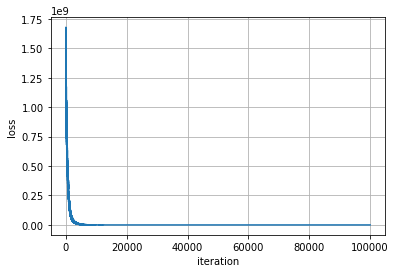

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()
plt.plot(loss_vec)
#plt.xlim(0,25)
#plt.ylim(0,2)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.savefig(str(hidden_size)+'.png')

In [10]:
# 重みの保存
saver = tf.train.Saver()
saver.save(sess, './model.ckpt')


'./model.ckpt'

In [11]:
# ボール座標とスティックの傾きプロット
by_max=IN_train.max(axis=0)[1]
by_min=IN_train.min(axis=0)[1]

ball_y = np.array(range(int(by_min)-3,int(by_max)+3))
for i in range(len(ball_y)):
    
    ball = np.array([[6.0, ball_y[i]/10.0]])
    
    print(ball)
    joy = sess.run(final_output, feed_dict={INPUT: ball})
    plt.scatter(ball[0][1],ball[0][0], s=200, c='orange')
    
    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)
    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)
    print(joy)
    plt.savefig(str(hidden_size)+'_img'+'.png')

[[ 6.  -0.6]]


ValueError: Cannot feed value of shape (1, 2) for Tensor 'Placeholder:0', which has shape '(?, 6)'

In [ ]:
# 重みのrestore
predicts_sess = tf.Session()
ckpt = tf.train.get_checkpoint_state('./')
if ckpt == None:
    print('!!!!!!!WEIGHTS NOT FOUND!!!!!!')

saver.restore(predicts_sess, './model.ckpt')